In [1]:
from tensorflow import keras

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 신경망 심층신경망(2개이상의 dense층)

In [5]:
iris.data.shape

(150, 4)

In [6]:
model = keras.Sequential()
model.add( keras.layers.Dense(64,activation = 'relu',input_shape=(4,)) )
model.add( keras.layers.Dense(32,activation = 'relu' ) )
# model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(3,activation = 'softmax') )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(iris.data,iris.target, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_text_scaled = ss.transform(x_test)

In [9]:
cb = keras.callbacks.ModelCheckpoint('iris_dnn.h5')
earlyst_cb = keras.callbacks.EarlyStopping(patience=1,restore_best_weights=True)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train_scaled, y_train,epochs=30,validation_data=(x_text_scaled,y_test),callbacks=[cb, earlyst_cb])

Epoch 1/30
4/4 [==============================] - 8s 86ms/step - loss: 1.1046 - accuracy: 0.4018 - val_loss: 1.0430 - val_accuracy: 0.5789
Epoch 2/30
4/4 [==============================] - 0s 21ms/step - loss: 1.0124 - accuracy: 0.6429 - val_loss: 0.9495 - val_accuracy: 0.6842
Epoch 3/30
4/4 [==============================] - 0s 24ms/step - loss: 0.9396 - accuracy: 0.6518 - val_loss: 0.8740 - val_accuracy: 0.6842
Epoch 4/30
4/4 [==============================] - 0s 25ms/step - loss: 0.8787 - accuracy: 0.6518 - val_loss: 0.8145 - val_accuracy: 0.6842
Epoch 5/30
4/4 [==============================] - 0s 21ms/step - loss: 0.8306 - accuracy: 0.6607 - val_loss: 0.7658 - val_accuracy: 0.6842
Epoch 6/30
4/4 [==============================] - 0s 23ms/step - loss: 0.7895 - accuracy: 0.6607 - val_loss: 0.7228 - val_accuracy: 0.6842
Epoch 7/30
4/4 [==============================] - 0s 23ms/step - loss: 0.7532 - accuracy: 0.6607 - val_loss: 0.6824 - val_accuracy: 0.6842
Epoch 8/30
4/4 [===========

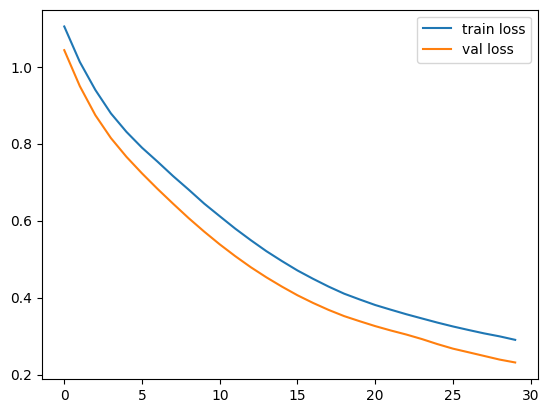

In [10]:
# loss 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


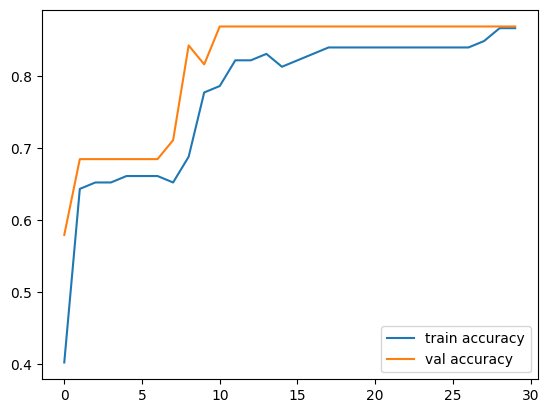

In [11]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_train_scaled,y_train)

4/4 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.8661


[0.28408804535865784, 0.8660714030265808]

In [13]:
import numpy as np
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [14]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

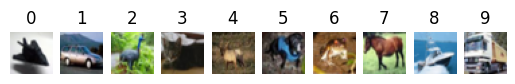

In [15]:
# 각 클래스별 이미지 출력
for i in range(10):
  index = np.where(y_train == i)[0][0]
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[index])
  plt.title(i)
  plt.axis('off')
plt.show()

In [16]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [17]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [18]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(32,32,3)),
 keras.layers.Dense(64,activation = 'relu'),
 keras.layers.Dense(32,activation = 'relu'),
 keras.layers.Dense(10,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9179 - accuracy: 0.3074 - val_loss: 1.7893 - val_accuracy: 0.3458
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7530 - accuracy: 0.3727 - val_loss: 1.6816 - val_accuracy: 0.3960
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6952 - accuracy: 0.3942 - val_loss: 1.7155 - val_accuracy: 0.3782
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6672 - accuracy: 0.4020 - val_loss: 1.6689 - val_accuracy: 0.4013
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6450 - accuracy: 0.4075 - val_loss: 1.6784 - val_accuracy: 0.3907
Epoch 6/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6181 - accuracy: 0.4182 - val_loss: 1.6682 - val_accuracy: 0.4039
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6053 - accuracy: 0.4216 - val_loss: 1.5945 - val_ac

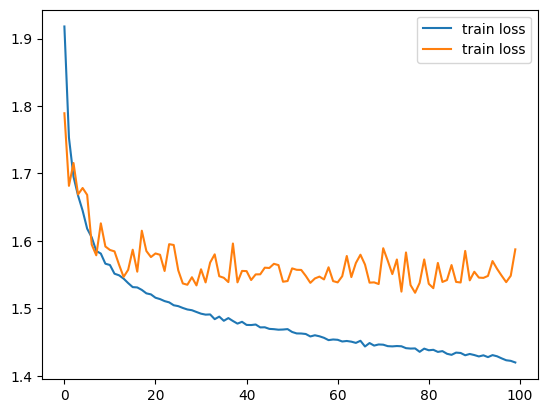

In [20]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='train loss')
plt.legend()
plt.show()

In [2]:
# PCA 이용
from tensorflow import keras
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train_scaled = x_train / 255.0
pca.fit(x_train_scaled.reshape(50000,-1))

PCA(n_components=2)

In [7]:
x_test_scaled = x_test / 255.0
x_train_scaled_pca = pca.transform(x_train_scaled.reshape(50000,-1))
x_test_scaled_pca = pca.transform(x_test_scaled.reshape(10000,-1))

In [8]:
x_train_scaled_pca.shape

(50000, 2)

In [ ]:
# 신경망 구성

In [ ]:
from keras.api._v2.keras import callbacks
from keras.engine.training import optimizer
model = keras.Sequential()
model.add( keras.layers.Dense(64,activation='relu',input_shape=(2,)) )
model.add( keras.layers.Dense(32,activation='relu') )
model.add( keras.layers.Dense(10,activation='softmax') )

cb = keras.callbacks.ModelCheckpoint('cifar10.h5',save_best_only=True)
est =  keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train_scaled_pca,y_train,epochs = 100, validation_data=(x_test_scaled_pca,y_test),
          callbacks=[cb,est])

Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 2.1555 - accuracy: 0.2011 - val_loss: 2.1394 - val_accuracy: 0.2071
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1395 - accuracy: 0.2063 - val_loss: 2.1368 - val_accuracy: 0.2124
Epoch 3/100
 542/1563 [=========>....................] - ETA: 3s - loss: 2.1357 - accuracy: 0.2042